In [1]:
# Load the needed libraries into the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from graphviz import Source
from subprocess import call
from IPython.display import SVG
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

                     wave  stfips  st      recnumbr repdate         dob  \
0  Age 17 Baseline Survey  Alaska  AK  450290395006  201103  1993-10-15   
1  Age 17 Baseline Survey  Alaska  AK  450448396586  201103  1993-12-15   
2  Age 17 Baseline Survey  Alaska  AK  450461296715  201103  1993-10-15   
3  Age 17 Baseline Survey  Alaska  AK  450540097503  201103  1993-10-15   
4  Age 17 Baseline Survey  Alaska  AK  450652098623  201103  1994-02-15   

      sex amiakn asian blkafram       ...       baseline fy11cohort elig19  \
0  female     no    no       no       ...            yes        yes    yes   
1  female    yes    no       no       ...            yes        yes    yes   
2  female     no    no       no       ...            yes         no     no   
3  female     no    no       no       ...            yes        yes    yes   
4    male     no    no       no       ...            yes        yes    yes   

  elig21 samplestate insample responded                              race  \
0  

Text(0.5,0,'Homeless')

Text(0,0.5,'Count of Foster Youth')

Text(0.5,1,'Homeless Youth')

Text(0.5,0,'Incarerated')

Text(0,0.5,'Count of Foster Youth')

Text(0.5,1,'Incarcerated Youth')

wave               0
stfips             0
st                 0
recnumbr           0
repdate            0
dob                0
sex               75
amiakn             0
asian              0
blkafram           0
hawaiipi           0
white              0
raceunkn           0
racedcln           0
hisorgin          22
outcmrpt         102
outcmdte           0
outcmfcs          78
currfte            0
currpte            0
emplysklls         0
socsecrty         78
educaid           78
pubfinas          78
pubfoodas         78
pubhousas         80
othrfinas         78
highedcert       152
currenroll        80
cnctadult         78
homeless          91
subabuse          78
incarc            78
children          79
marriage          78
medicaid           0
othrhlthin        78
medicalin         78
mentlhlthin       78
prescripin        78
baseline           0
fy11cohort         0
elig19             0
elig21         44701
samplestate        0
insample       19237
responded          0
race         

wave           category
stfips         category
st               object
recnumbr         object
repdate          object
dob              object
sex            category
amiakn         category
asian          category
blkafram       category
hawaiipi       category
white          category
raceunkn       category
racedcln       category
hisorgin       category
outcmrpt       category
outcmdte         object
outcmfcs       category
currfte        category
currpte        category
emplysklls     category
socsecrty      category
educaid        category
pubfinas       category
pubfoodas      category
pubhousas      category
othrfinas      category
highedcert     category
currenroll     category
cnctadult      category
homeless       category
subabuse       category
incarc         category
children       category
marriage       category
medicaid       category
othrhlthin     category
medicalin      category
mentlhlthin    category
prescripin     category
baseline       category
fy11cohort     c

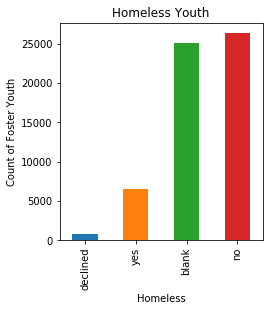

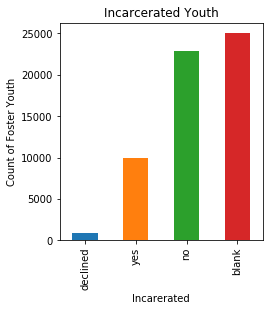

In [5]:
df = pd.read_stata('~/desktop/foster.dta')

print(df.head())

df.info()

print(df.describe())

print(df.shape)

print(df['homeless'].describe())

temp1 = df['homeless'].value_counts(ascending=True)
temp2 = df.pivot_table(values='incarc',index='homeless',aggfunc=lambda x: x.map({'Yes':1,'No':0}).mean())
print('Frequency Table of Homeless Incarcerated')
print(temp1)
print('\nProbability of being Homeless and Incarcerated')
print(temp2)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Homeless')
ax1.set_ylabel('Count of Foster Youth')
ax1.set_title("Homeless Youth")
temp1.plot(kind='bar')

temp3 = df['incarc'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Incarerated')
ax1.set_ylabel('Count of Foster Youth')
ax1.set_title("Incarcerated Youth")
temp3.plot(kind='bar')

df.apply(lambda x: sum(x.isnull()),axis=0)

df.dtypes

In [5]:
df.describe()

,wave,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,...,baseline,fy11cohort,elig19,elig21,samplestate,insample,responded,race,raceethn,stfcid
count,58729,58729,58729,58729,58729,58729,58654,58729,58729,58729,...,58729,58729,58729,14028,58729,39492,58729,58729,58729,58729
unique,3,52,52,30009,8,42,2,3,3,3,...,2,2,2,2,2,2,2,7,8,30009
top,Age 17 Baseline Survey,California,CA,799999789495,201109,1994-07-15,male,no,no,no,...,yes,yes,yes,yes,no,no,yes,White,"Non-Hispanic (NH), White",CT301100657990
freq,29104,8754,8754,3,14405,5298,30524,56781,57816,37733,...,57824,45222,34919,11471,37555,31399,33580,31176,25188,3


In [8]:
df_out = pd.read_stata('~/Desktop/foster_outcome.dta')

print(df_out.head(5))

                     wave          stfcid  stfips  st      recnumbr repdate  \
0  Age 17 Baseline Survey  AL000000007183       1  AL  000000007183  201403   
1  Age 17 Baseline Survey  AL000000038434       1  AL  000000038434  201409   
2  Age 17 Baseline Survey  AL000000046332       1  AL  000000046332  201403   
3  Age 17 Baseline Survey  AL000000059581       1  AL  000000059581  201403   
4  Age 17 Baseline Survey  AL000000121244       1  AL  000000121244  201409   

          dob     sex amiakn asian    ...    othrhlthin       medicalin  \
0  1996-10-15  female     no    no    ...            no             yes   
1  1997-05-15    male     no    no    ...            no             yes   
2  1996-10-15    male     no    no    ...            no  not applicable   
3  1996-11-15  female     no    no    ...         blank           blank   
4  1997-07-15  female     no    no    ...         blank           blank   

      mentlhlthin      prescripin baseline fy14cohort elig19 samplestate  

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_tot = pd.read_csv('~/Desktop/foster_total.csv', low_memory=False)

df_tot

df_tot.shape

(292116, 70)

In [9]:
df_serv = pd.read_stata('~/Desktop/foster_service.dta')

print(df_serv.head(5))

     fy  stfips  st repdate      recnumbr         dob     sex amiakn asian  \
0  2013       1  AL  201309  000000009831  1998-07-15  Female     No    No   
1  2014       1  AL  201409  000000009831  1998-07-15  Female     No    No   
2  2015       1  AL  201509  000000009831  1998-07-15  Female     No    No   
3  2011       1  AL  201109  000000014871  1996-08-15  Female     No    No   
4  2012       1  AL  201209  000000014871  1996-08-15  Female     No    No   

  blkafram  ...  famsuppsv mentorsv silsv rmbrdfasv educfinasv othrfinasv  \
0       No  ...        Yes       No    No        No         No         No   
1       No  ...        Yes       No    No        No         No         No   
2       No  ...        Yes       No    No        No         No         No   
3      Yes  ...         No       No    No        No         No         No   
4      Yes  ...         No       No    No        No         No         No   

           stfcid        race        raceethn agemp  
0  AL000000009

In [7]:
df_fost = pd.read_stata("~/Desktop/foster.dta")

df_fost

,wave,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,...,baseline,fy11cohort,elig19,elig21,samplestate,insample,responded,race,raceethn,stfcid
0,Age 17 Baseline Survey,Alaska,AK,450290395006,201103,1993-10-15,female,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450290395006
1,Age 17 Baseline Survey,Alaska,AK,450448396586,201103,1993-12-15,female,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK450448396586
2,Age 17 Baseline Survey,Alaska,AK,450461296715,201103,1993-10-15,female,no,no,no,...,yes,no,no,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450461296715
3,Age 17 Baseline Survey,Alaska,AK,450540097503,201103,1993-10-15,female,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450540097503
4,Age 17 Baseline Survey,Alaska,AK,450652098623,201103,1994-02-15,male,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450652098623
5,Age 17 Baseline Survey,Alaska,AK,450660898711,201103,1993-12-15,male,yes,no,no,...,yes,no,no,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK450660898711
6,Age 17 Baseline Survey,Alaska,AK,451448406587,201109,1994-05-15,female,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK451448406587
7,Age 17 Baseline Survey,Alaska,AK,451453006633,201103,1994-02-15,male,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,Hispanic (Any Race),AK451453006633
8,Age 17 Baseline Survey,Alaska,AK,451560107704,201103,1994-03-15,male,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,More Than One Race,"NH, More than One Race",AK451560107704
9,Age 17 Baseline Survey,Alaska,AK,451586507968,201103,1993-10-15,female,no,no,yes,...,yes,yes,yes,NaN,no,NaN,yes,Black or African American,"NH, Black",AK451586507968


In [10]:
del df_fost['stfips']
del df_fost['fy11cohort']
del df_fost['elig21']
del df_fost['race']
del df_fost['raceethn']
del df_out['stfips']
del df_out['fy14cohort']
del df_serv['st']
del df_serv['repdate']
del df_serv['recnumbr']
del df_serv['dob']
del df_serv['sex']
del df_serv['amiakn']
del df_serv['blkafram']
del df_serv['hawaiipi']
del df_serv['white']
del df_serv['raceunkn']
del df_serv['racedcln']
del df_serv['hisorgin']
del df_serv['asian']

In [11]:
frames = [df_fost,df_out]
df_com = pd.concat(frames, sort=True)

df_com
df_com.shape

df_all = df_com.set_index('stfcid').join(df_serv.set_index('stfcid'), lsuffix='_df_com', 
                                rsuffix='_df_serv')

df_all
df_all.shape


,amiakn,asian,baseline,blkafram,children,cnctadult,currenroll,currfte,currpte,dob,...,repdate,responded,samplestate,sex,socsecrty,st,stfcid,subabuse,wave,white
0,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,201103,yes,no,female,yes,AK,AK450290395006,yes,Age 17 Baseline Survey,yes
1,yes,no,yes,no,no,yes,yes,no,no,1993-12-15,...,201103,yes,no,female,no,AK,AK450448396586,no,Age 17 Baseline Survey,no
2,no,no,yes,no,yes,yes,yes,yes,yes,1993-10-15,...,201103,yes,no,female,yes,AK,AK450461296715,yes,Age 17 Baseline Survey,yes
3,no,no,yes,no,no,yes,yes,no,yes,1993-10-15,...,201103,yes,no,female,yes,AK,AK450540097503,no,Age 17 Baseline Survey,yes
4,no,no,yes,no,no,yes,yes,no,no,1994-02-15,...,201103,yes,no,male,no,AK,AK450652098623,no,Age 17 Baseline Survey,yes
5,yes,no,yes,no,yes,yes,yes,yes,yes,1993-12-15,...,201103,yes,no,male,yes,AK,AK450660898711,yes,Age 17 Baseline Survey,no
6,yes,no,yes,no,no,yes,yes,no,no,1994-05-15,...,201109,yes,no,female,no,AK,AK451448406587,no,Age 17 Baseline Survey,no
7,no,no,yes,no,no,yes,yes,no,declined,1994-02-15,...,201103,yes,no,male,declined,AK,AK451453006633,yes,Age 17 Baseline Survey,yes
8,yes,no,yes,no,no,yes,yes,no,no,1994-03-15,...,201103,yes,no,male,no,AK,AK451560107704,no,Age 17 Baseline Survey,yes
9,no,no,yes,yes,no,yes,yes,no,no,1993-10-15,...,201103,yes,no,female,no,AK,AK451586507968,yes,Age 17 Baseline Survey,no


(98991, 45)

,amiakn,asian,baseline,blkafram,children,cnctadult,currenroll,currfte,currpte,dob,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",19
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,No,White Only,"NH, White Only",20
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",21
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18


(328428, 69)

In [13]:
df_all.dtypes
missing = ['pubfoodas','pubhousas','racedcln','raceunkn','recnumbr','repdate','responded','samplestate','sex']
for i in missing:
    df_all[i].dtypes

amiakn         category
asian          category
baseline         object
blkafram       category
children       category
cnctadult      category
currenroll     category
currfte        category
currpte        category
dob              object
educaid        category
elig19         category
emplysklls     category
hawaiipi       category
highedcert     category
hisorgin         object
homeless       category
incarc         category
insample       category
marriage       category
medicaid       category
medicalin      category
mentlhlthin    category
othrfinas      category
othrhlthin       object
outcmdte         object
outcmfcs         object
outcmrpt       category
prescripin     category
pubfinas       category
                 ...   
socsecrty      category
st               object
subabuse       category
wave             object
white          category
fy              float64
stfips          float64
fcstatsv       category
lclfipssv      category
tribesv        category
delinqntsv     c

CategoricalDtype(categories=['no', 'yes', 'declined', 'blank', 'not applicable'], ordered=True)

CategoricalDtype(categories=['no', 'yes', 'declined', 'blank', 'not applicable'], ordered=True)

dtype('O')

CategoricalDtype(categories=['no', 'yes', 'Unknown'], ordered=True)

dtype('O')

dtype('O')

CategoricalDtype(categories=['no', 'yes'], ordered=True)

CategoricalDtype(categories=['no', 'yes'], ordered=True)

CategoricalDtype(categories=['male', 'female'], ordered=True)

In [14]:
df_cat = pd.DataFrame()
cat_var = ['sex','race','raceethn']
for i in cat_var:
    df_cat[i] = df_all[i].cat.codes
print(df_cat.head())
df_cat.describe()

                sex  race  raceethn
stfcid                             
AK450290395006    1     0         0
AK450290395006    1     0         0
AK450290395006    1     0         0
AK450290395006    1     0         0
AK450290395006    1     0         0


,sex,race,raceethn
count,328428.000000,328428.000000,328428.000000
mean,0.515273,0.982276,1.637214
std,0.500224,1.927469,2.477794
min,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000
max,1.000000,6.000000,7.000000


In [15]:
df_all.isnull().sum()
for i in missing:
    df_all[i].isnull().sum()

amiakn             0
asian              0
baseline           0
blkafram           0
children          87
cnctadult         86
currenroll        93
currfte            0
currpte            0
dob                0
educaid           86
elig19             0
emplysklls         0
hawaiipi           0
highedcert       283
hisorgin          96
homeless         108
incarc            86
insample       73281
marriage          86
medicaid           0
medicalin         86
mentlhlthin       86
othrfinas         86
othrhlthin        86
outcmdte           0
outcmfcs          86
outcmrpt         117
prescripin        86
pubfinas          86
               ...  
socsecrty         86
st                 0
subabuse          86
wave               0
white              0
fy             36312
stfips         36312
fcstatsv       36312
lclfipssv      36312
tribesv        36312
delinqntsv     36312
edlevlsv       36312
specedsv       36312
ilnasv         36312
acsuppsv       36312
psedsuppsv     36312
careersv     

86

99

0

0

0

0

0

0

75

In [16]:
var = list(df_all.select_dtypes(include=["category"]))
for i in var:
    df_all[i] = df_all[i].cat.add_categories("0").fillna("0")

In [17]:
na_var = ['hisorgin','othrhlthin','outcmfcs','fy','stfips']
for i in na_var:
    df_all[i]= df_all[i].fillna(0)

In [17]:
df_all.to_csv("~/Desktop/foster_all.csv")

In [18]:
df['homeless'].head(5)
df['blkafram']

0     no
1     no
2    yes
3    yes
4    yes
Name: homeless, dtype: category
Categories (4, object): [no < yes < declined < blank]

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9        yes
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20       yes
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
58699     no
58700     no
58701     no
58702     no
58703     no
58704     no
58705     no
58706     no
58707     no
58708     no
58709     no
58710     no
58711     no
58712     no
58713     no
58714    yes
58715     no
58716     no
58717     no
58718     no
58719     no
58720     no
58721     no
58722     no
58723     no
58724     no
58725     no
58726     no
58727     no
58728     no
Name: blkafram, Length: 58729, dtype: category
Categories (3, object): [no < yes < Unknown]

In [19]:
df_prep = pd.DataFrame()

df_model = pd.DataFrame()

non_var = ['dob','elig19','insample','outcmdte','recnumbr', 'repdate',
           'responded','samplestate','st','fy','stfips','agemp','baseline','lclfipssv']

code_var = ['sex','race','raceethn','fcstatsv']

other_var = ['children','cnctadult','currenroll','currfte','currpte','educaid','emplysklls',
           'highedcert','homeless','incarc','marriage','medicaid','medicalin',
           'mentlhlthin','othrfinas','othrhlthin','outcmfcs','outcmrpt','prescripin',
           'pubfinas','pubfoodas','pubhousas','socsecrty','subabuse','fcstatsv',
           'tribesv','delinqntsv','edlevlsv','specedsv','ilnasv','acsuppsv',
           'psedsuppsv','careersv','emplytrsv','budgetsv','housedsv','hlthedsv',
           'famsuppsv','mentorsv','silsv','rmbrdfasv','educfinasv','othrfinasv']

model_var = ['amiakn','asian','blkafram','hawaiipi','hisorgin','racedcln','raceunkn','sex',
             'white','race','raceethn','wave','children','cnctadult','currenroll',
             'currfte','currpte','educaid','emplysklls','highedcert','homeless','incarc',
             'marriage','medicaid','medicalin','mentlhlthin','othrfinas','othrhlthin',
             'outcmfcs','outcmrpt','prescripin','pubfinas','pubfoodas','pubhousas',
             'socsecrty','subabuse','fcstatsv','tribesv','delinqntsv','edlevlsv',
             'specedsv','ilnasv','acsuppsv','psedsuppsv','careersv','emplytrsv',
             'budgetsv','housedsv','hlthedsv','famsuppsv','mentorsv','silsv','rmbrdfasv',
             'educfinasv','othrfinasv','agemp','stfips']

scored_var = ['cnctadult','currenroll','currfte','currpte','educaid','emplysklls',
              'highedcert','homeless','incarc','subabuse','fcstatsv',
              'tribesv','delinqntsv','edlevlsv','specedsv','ilnasv','acsuppsv',
              'psedsuppsv','careersv','emplytrsv','budgetsv','housedsv','hlthedsv',
              'famsuppsv','mentorsv','silsv','rmbrdfasv','educfinasv','othrfinasv','outcmrpt']

non_scored_var = ['amiakn','asian','blkafram','hawaiipi','hisorgin','racedcln','raceunkn',
                  'sex','white','race','raceethn','wave','children','marriage','medicaid',
                  'medicalin','mentlhlthin','othrfinas','othrhlthin','outcmfcs',
                  'prescripin','pubfinas','pubfoodas','pubhousas',
                  'socsecrty','agemp','stfips']

var_list_1 = ['homeless','incarc','subabuse']     

var_list_2 = ['highedcert']

var_list_3 = ['cnctadult','currenroll','currfte','currpte','emplysklls']

var_list_4 = ['outcmrpt']

var_list_5 = ['children','marriage']

var_list_6 = ['educaid','emplysklls','medicaid','medicalin',
              'mentlhlthin','othrfinas','othrhlthin','outcmfcs','prescripin',
              'pubfinas','pubfoodas','pubhousas','socsecrty']
var_list_7 = ['tribesv','delinqntsv','edlevlsv','specedsv','ilnasv',
              'acsuppsv','psedsuppsv','careersv','emplytrsv','budgetsv','housedsv',
              'hlthedsv','famsuppsv','mentorsv','silsv','rmbrdfasv','educfinasv','othrfinasv']

var_list_8 = ['fcstatsv']

var_list_9 = ['edlevlsv']

var_list_10 = ['hisorgin','racedcln','raceunkn']

var_list_11 = ['wave']

var_list_12 = ['amiakn','asian','blkafram','hawaiipi','white']

dat_dic_1 = dict({'no':3, 'yes':0, 'unknown':1, 'decline':1, 'blank':1,'do not know':1, 
                  'NA':1, 'not applicable':1, 'Zero':0})

dat_dic_2 = dict({'none of the above':0, 'vocational license':5, 
                  'vocational certificate':5,'higher degree':5,'associate degree':5,
                  'bachelor degree':5,'high school or ged':3, 'Zero':0})

dat_dic_3 = dict({'no':0, 'yes':3,'unknown':1, 'decline':1, 'blank':1,'do not know':1, 
                  'NA':1, 'not applicable':1, 'Zero':0})

dat_dic_4 = dict({'blank':1,'death':(-999),'incarcerated':0,'runaway or missing':0,
                  'incapacitated':0,'unable to locate':1,'declined':1,'not in sample':1,
                  'parent declined':1,'participated':3,'NA':1,'Zero':0})

dat_dic_5 = dict({'blank':0,'declined':0,'yes':1,'no':0,'Zero':0,'not applicable':0,
                  'do not know':0,'Blank':0,'Unknown':0,'Yes':1,'No':0})

dat_dic_6 = dict({'Yes, received services & was in FC':1,
                  'No, received services, but was not in FC':0,'Zero':0,'2':0})

dat_dic_7 = dict({'Less than 6th grade':0,'6th grade':1,'7th grade':2,'8th grade':3,
                  '9th grade':4,'10th grade':5,'11th grade':6,'12th grade':7,
                  'Post secondary':8,'College':9,'Blank':0,'Zero':0})

dat_dic_8 = dict({'Zero':0,'Age 17 Baseline Survey':1,'Age 19 Followup':2,
                  'Age 21 Followup':3})

for i in df_all:
    if i in var_list_1:
        df_prep[i] = df_all[i].map(dat_dic_1)
        
df_prep['highedcert'] = df_all['highedcert'].map(dat_dic_2)

for i in df_all:
    if i in var_list_3:
        df_prep[i] = df_all[i].map(dat_dic_3)

df_prep['outcmrpt'] = df_all['outcmrpt'].replace(dat_dic_4)

for i in df_all:
    if i in var_list_5:
        df_prep[i] = df_all[i].map(dat_dic_5)

for i in df_all:
    if i in var_list_6:
        df_prep[i] = df_all[i].map(dat_dic_5)
        
for i in df_all:
    if i in var_list_7:
        df_prep[i] = df_all[i].map(dat_dic_5)

df_prep['fcstatsv'] = df_all['fcstatsv'].replace(dat_dic_8)

df_prep['edlevlsv'] = df_all['edlevlsv'].map(dat_dic_7)

for i in df_all:
    if i in var_list_10:
        df_prep[i] = df_all[i].map(dat_dic_5)
        
df_prep['wave'] = df_all['wave'].map(dat_dic_8)
        
for i in df_all:
    if i in var_list_12:
        df_prep[i] = df_all[i].map(dat_dic_5) 


for i in code_var:
    df_prep[i] = df_all[i].cat.codes

df_prep.fcstatsv.replace(2,0)

for i in non_var:
    df_prep[i] = df_all[i]
    
df_prep.head(5)

for i in scored_var:
    df_model[i] = df_prep[i]

score = df_model.astype(float).sum(axis=1)

df_model.head(5)

score

df_model['score'] = score

for i in non_scored_var:
    df_model[i] = df_prep[i]

stfcid
AK450290395006    1
AK450290395006    1
AK450290395006    1
AK450290395006    0
AK450290395006    0
AK450290395006    0
AK450290395006    1
AK450290395006    1
AK450290395006    1
AK450290395006    0
AK450290395006    0
AK450290395006    0
AK450290395006    1
AK450290395006    1
AK450290395006    1
AK450290395006    0
AK450290395006    0
AK450290395006    0
AK450292595028    1
AK450292595028    1
AK450292595028    0
AK450448396586    1
AK450448396586    1
AK450448396586    1
AK450448396586    1
AK450448396586    0
AK450448396586    0
AK450448396586    0
AK450448396586    1
AK450448396586    1
                 ..
WY000003294179    1
WY000003294179    1
WY000003348555    0
WY000003371067    1
WY000003371067    1
WY000003434039    1
WY000003434039    1
WY000003434039    1
WY000003500252    0
WY000003500252    0
WY000003516716    0
WY000003516716    0
WY000003517584    1
WY000003517584    1
WY000003530387    0
WY000003530387    0
WY000003574620    0
WY000003574620    0
WY00000358799

,homeless,incarc,subabuse,highedcert,cnctadult,currenroll,currfte,currpte,emplysklls,outcmrpt,...,recnumbr,repdate,responded,samplestate,st,fy,stfips,agemp,baseline,lclfipssv
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2011.0,2.0,17,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2011.0,2.0,17,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2012.0,2.0,18,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2013.0,2.0,19,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2014.0,2.0,20,yes,<1000 Records in AFCARS


,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,budgetsv,housedsv,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,outcmrpt
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


stfcid
AK450290395006    17.0
AK450290395006    24.0
AK450290395006    24.0
AK450290395006    21.0
AK450290395006    21.0
AK450290395006    21.0
AK450290395006    14.0
AK450290395006    21.0
AK450290395006    21.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    14.0
AK450290395006    21.0
AK450290395006    21.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    18.0
AK450292595028    22.0
AK450292595028    25.0
AK450292595028    24.0
AK450448396586    23.0
AK450448396586    28.0
AK450448396586    31.0
AK450448396586    31.0
AK450448396586    27.0
AK450448396586    27.0
AK450448396586    26.0
AK450448396586    22.0
AK450448396586    27.0
                  ... 
WY000003294179    22.0
WY000003294179    22.0
WY000003348555    14.0
WY000003371067    24.0
WY000003371067    33.0
WY000003434039    20.0
WY000003434039    18.0
WY000003434039    17.0
WY000003500252    17.0
WY000003500252    23.0
WY000003516716    17.0
WY000003516716    17.0
WY00

In [20]:
df_model.describe()
df_model.score.describe()

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,mentlhlthin,othrfinas,othrhlthin,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,stfips
count,324338.000000,324914.000000,326144.000000,324570.000000,328342.000000,328428.000000,212167.000000,323642.000000,323776.000000,323626.000000,...,328342.000000,328342.000000,328342.000000,328342.000000,328342.000000,328342.000000,328342.000000,328329.000000,328342.000000,328428.000000
mean,2.203350,1.843793,0.505657,0.744382,0.096993,0.182037,1.101472,1.955689,1.843197,1.960102,...,0.072117,0.080766,0.100340,0.652978,0.080526,0.024353,0.066997,0.018210,0.078555,21.038995
std,1.044915,1.212659,0.775538,1.007956,0.295949,0.385875,1.525525,1.173696,1.211706,1.171914,...,0.258682,0.272476,0.300454,0.476024,0.272106,0.154142,0.250018,0.133712,0.269044,17.351844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,5.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000


count    328428.000000
mean         22.382985
std          33.950156
min        -991.000000
25%          17.000000
50%          24.000000
75%          29.000000
max          53.000000
Name: score, dtype: float64

In [21]:
df_model.score.describe()

count    328428.000000
mean         22.382985
std          33.950156
min        -991.000000
25%          17.000000
50%          24.000000
75%          29.000000
max          53.000000
Name: score, dtype: float64

In [22]:
df_prep.describe()

,homeless,incarc,subabuse,highedcert,cnctadult,currenroll,currfte,currpte,emplysklls,children,...,amiakn,asian,blkafram,hawaiipi,white,sex,race,raceethn,fy,stfips
count,323642.000000,323776.000000,323626.000000,212167.000000,324338.000000,324914.000000,326144.000000,324570.000000,328428.000000,328341.000000,...,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000
mean,1.955689,1.843197,1.960102,1.101472,2.203350,1.843793,0.505657,0.744382,0.182037,0.064920,...,0.036870,0.016841,0.370249,0.005283,0.552322,0.515958,1.866781,2.632282,1790.725349,21.038995
std,1.173696,1.211706,1.171914,1.525525,1.044915,1.212659,0.775538,1.007956,0.385875,0.246386,...,0.188442,0.128675,0.482872,0.072490,0.497256,0.500203,2.549935,2.975988,631.361780,17.351844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,6.000000
50%,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,17.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,6.000000,2014.000000,36.000000
max,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7.000000,8.000000,2016.000000,72.000000


In [20]:
mean_score = df_model.groupby(df_model.index)['score'].mean()
mean_score
df_model = df_model.join(mean_score, lsuffix='_model', rsuffix='_mean')

stfcid
AK450290395006    19.333333
AK450292595028    23.666667
AK450448396586    25.904762
AK450461296715    28.444444
AK450540097503    25.111111
AK450564097743    28.166667
AK450652098623    25.000000
AK450660898711    26.142857
AK450862600729    22.000000
AK450876000863    23.000000
AK451045802561    29.600000
AK451448406587    25.666667
AK451453006633    23.833333
AK451558407687    18.166667
AK451560107704    25.888889
AK451586507968    23.250000
AK451625008353    18.000000
AK451633808441    22.500000
AK451661708720    27.888889
AK451960711710    26.142857
AK452032812431    22.300000
AK452045812561    18.500000
AK452139013493    13.333333
AK452507217175    20.666667
AK452558417687    19.583333
AK452644618549     9.000000
AK452653818641    28.666667
AK452659118694    17.000000
AK453061922722    28.333333
AK453155323656    15.333333
                    ...    
WY000002906190    24.333333
WY000002936458    10.000000
WY000002943626    20.333333
WY000002975987    25.000000
WY00000298825

In [24]:
df_model

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,othrhlthin,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,18,2.0,19.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,19,2.0,19.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,20,2.0,19.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,21,2.0,19.333333
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,2.0,19.333333
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,2.0,19.333333
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18,2.0,19.333333


In [21]:
def func(x):
    if x > 22:
        return 'Success'
    else:
        return 'Failure'

df_model['label'] = df_model['score_mean'].apply(func)
    
df_model.head(5)

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,18,2.0,19.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,19,2.0,19.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,20,2.0,19.333333,Failure


In [26]:
df_model.label

stfcid
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450292595028    Success
AK450292595028    Success
AK450292595028    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
                   ...   
WY000003294179    Failure
WY000003294179    Failure
WY000003348555    Failure
WY000003371067    Success
WY000003371067    Success
WY000003434039    Failure
WY000003434039    Failure
WY000

In [22]:
df_model['score'] = score
df_model = df_model.fillna(0)

In [28]:
df_model_group = df_model.groupby([df_model.index,'score']).mean()
df_model_group

cnctadult  currenroll  currfte  currpte  educaid  \
stfcid         score                                                     
AK450290395006 14.0         3.0    0.000000      0.0      0.0      0.0   
               17.0         3.0    3.000000      0.0      0.0      0.0   
               18.0         3.0    0.000000      0.0      0.0      0.0   
               21.0         3.0    1.285714      0.0      0.0      0.0   
               24.0         3.0    3.000000      0.0      0.0      0.0   
AK450292595028 22.0         3.0    3.000000      0.0      0.0      0.0   
               24.0         3.0    3.000000      0.0      0.0      0.0   
               25.0         3.0    3.000000      0.0      0.0      0.0   
AK450448396586 19.0         3.0    0.000000      0.0      0.0      0.0   
               22.0         3.0    0.000000      0.0      0.0      0.0   
               23.0         3.0    1.000000      0.0      0.0      0.0   
               24.0         3.0    0.000000      0.0      0.0      0.0   
               25.0         3.0    0.000000      0.0      0.0      0.0   
               26.0         3.0    1.000000      0.0      0.0      0.0   
               27.0         3.0    1.200000      0.0      0.0      0.0   
               28.0         3.0    3.000000      0.0      0.0      0.0   
               30.0         3.0    0.000000      0.0      0.0      0.0   
               31.0         3.0    3.000000      0.0      0.0      0.0   
AK450461296715 21.0         3.0    3.000000      3.0      3.0      1.0   
               25.0         3.0    3.000000      3.0      3.0      1.0   
               26.0         3.0    3.000000      3.0      3.0      1.0   
               28.0         3.0    3.000000      3.0      3.0      1.0   
               29.0         3.0    3.000000      3.0      3.0      1.0   
               30.0         3.0    3.000000      3.0      3.0      1.0   
               31.0         3.0    3.000000      3.0      3.0      1.0   
               36.0         3.0    3.000000      3.0      3.0      1.0   
AK450540097503 19.0         3.0    0.000000      3.0      0.0      0.0   
               20.0         3.0    0.000000      3.0      0.0      0.0   
               21.0         3.0    0.000000      3.0      0.0      0.0   
               22.0         3.0    0.000000      3.0      0.0      0.0   
...                         ...         ...      ...      ...      ...   
WY000003192063 25.0         3.0    3.000000      0.0      0.0      0.0   
               28.0         3.0    3.000000      0.0      0.0      0.0   
WY000003265787 14.0         3.0    3.000000      0.0      0.0      0.0   
               17.0         3.0    0.000000      0.0      3.0      0.0   
WY000003294179 22.0         3.0    1.500000      1.5      0.0      0.0   
WY000003348555 14.0         1.0    1.000000      1.0      1.0      0.0   
WY000003371067 24.0         3.0    3.000000      0.0      0.0      0.0   
               33.0         3.0    0.000000      3.0      0.0      0.0   
WY000003434039 17.0         1.0    1.000000      1.0      1.0      0.0   
               18.0         1.0    1.000000      1.0      1.0      0.0   
               20.0         1.0    1.000000      1.0      1.0      0.0   
WY000003500252 17.0         3.0    3.000000      0.0      0.0      0.0   
               23.0         3.0    0.000000      0.0      3.0      0.0   
WY000003516716 17.0         3.0    1.500000      1.5      0.0      0.0   
WY000003517584 14.0         1.0    1.000000      1.0      1.0      0.0   
               24.0         3.0    3.000000      0.0      3.0      0.0   
WY000003530387 10.0         1.0    1.000000      1.0      1.0      0.0   
               12.0         3.0    3.000000      0.0      0.0      0.0   
WY000003574620 10.0         1.0    1.000000      1.0      1.0      0.0   
               15.0         3.0    3.000000      0.0      0.0      0.0   
WY000003587997 14.0         1.0    1.000000      1.0      1.0      0.0   
               21.0       

In [29]:
df_model.describe()
df_model

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,othrhlthin,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,stfips,score_mean,score
count,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,...,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000
mean,2.175911,1.824065,0.502140,0.735638,0.096968,0.182037,0.711559,1.927190,1.817089,1.931443,...,0.100314,0.652807,0.080505,0.024346,0.066980,0.018205,0.078535,21.038995,22.382985,22.382985
std,1.066749,1.220980,0.773978,1.005223,0.295915,0.385875,1.334485,1.188449,1.222650,1.186868,...,0.300419,0.476079,0.272073,0.154122,0.249987,0.133692,0.269012,17.351844,24.163041,33.950156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-990.000000,-991.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.750000,17.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.750000,24.000000
75%,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,28.500000,29.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,5.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,47.500000,53.000000


,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label,score
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333,Failure,17.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333,Failure,24.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,18,2.0,19.333333,Failure,24.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,19,2.0,19.333333,Failure,21.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,20,2.0,19.333333,Failure,21.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,21,2.0,19.333333,Failure,21.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,19.333333,Failure,14.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,19.333333,Failure,21.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,18,2.0,19.333333,Failure,21.0


In [30]:
df_model.to_csv("~/Desktop/foster_model.csv")

In [23]:
df_mod_ml = df_model
df_mod_ml = df_mod_ml.replace('Older than 21',22)
df_mod_ml = df_mod_ml.replace('Success',1)
df_mod_ml = df_mod_ml.replace('Failure',2)
df_mod_ml = df_mod_ml.replace('unknown',0)

In [24]:
df_mod_ml = df_mod_ml.reset_index()

In [25]:
df_mod_ml = df_mod_ml.fillna(0)

In [34]:
df_mod_ml

,stfcid,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,...,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label,score
0,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333,2,17.0
1,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,19.333333,2,24.0
2,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,18,2.0,19.333333,2,24.0
3,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,19,2.0,19.333333,2,21.0
4,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,20,2.0,19.333333,2,21.0
5,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,21,2.0,19.333333,2,21.0
6,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,19.333333,2,14.0
7,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,19.333333,2,21.0
8,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,18,2.0,19.333333,2,21.0
9,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,19,2.0,19.333333,2,18.0


In [26]:
mod_array_1 = df_mod_ml.values
X = mod_array_1[:,1:60]
X = np.nan_to_num(X)
Y = mod_array_1[:,59]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring = 'accuracy'
Y_train = Y_train.astype('int')
Y_validation = Y_validation.astype('int')

In [196]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.233115 (0.001059)


/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.


LDA: 0.964364 (0.001144)
KNN: 0.716882 (0.003055)
CART: 0.999996 (0.000011)
NB: 0.782353 (0.004235)
SVM: 0.962168 (0.001530)


In [36]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.963021039491
[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 2]
 [0 0 0 ..., 0 0 1]]
             precision    recall  f1-score   support

       -656       0.00      0.00      0.00         1
       -655       0.00      0.00      0.00         1
       -654       0.40      1.00      0.57         2
       -653       0.00      0.00      0.00         2
       -650       1.00      1.00      1.00         3
       -649       1.00      0.50      0.67         2
       -648       1.00      0.67      0.80         3
       -647       1.00      0.67      0.80         6
       -646       0.33      1.00      0.50         1
       -645       1.00      0.50      0.67         2
       -642       1.00      1.00      1.00         2
       -640       1.00      1.00      1.00         2
       -488       1.00      0.33      0.50         3
       -486       0.38      1.00      0.55         3
       -485       0.00      0.00      0.00         2
       -

/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=17, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=18, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Number of Clusters')

Text(0,0.5,'Score')

Text(0.5,1,'Elbow Curve')

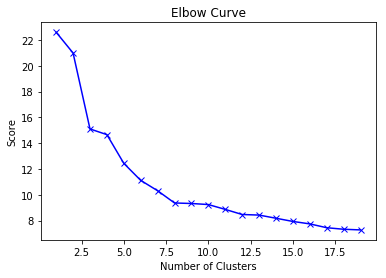

In [56]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.decomposition import PCA
Nc = range(1,20)
score = []
for i in Nc:
    kmeans = KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    score.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(Nc,score,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [57]:
kmeans_mod = KMeans(n_clusters=5).fit(X)
kmeans_mod.fit(X)
labels = kmeans_mod.labels_
df_model['cluster'] = labels

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
df_model.to_csv("~/Desktop/foster_model.csv")

In [59]:
df_model

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label,score,cluster
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,17,2.0,19.333333,Failure,17.0,4
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,17,2.0,19.333333,Failure,24.0,4
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,18,2.0,19.333333,Failure,24.0,4
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,19,2.0,19.333333,Failure,21.0,4
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,20,2.0,19.333333,Failure,21.0,4
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,21,2.0,19.333333,Failure,21.0,4
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,1.0,0.0,0.0,17,2.0,19.333333,Failure,14.0,4
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,1.0,0.0,0.0,17,2.0,19.333333,Failure,21.0,4
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,1.0,0.0,0.0,18,2.0,19.333333,Failure,21.0,4


In [36]:
X

array([[3.0, 3.0, 0.0, ..., 17.0, 2.0, 19.333333333333332],
       [3.0, 3.0, 0.0, ..., 17.0, 2.0, 19.333333333333332],
       [3.0, 3.0, 0.0, ..., 18.0, 2.0, 19.333333333333332],
       ...,
       [1.0, 1.0, 1.0, ..., 17.0, 56.0, 18.0],
       [3.0, 3.0, 0.0, ..., '0', 0.0, 15.5],
       [3.0, 0.0, 3.0, ..., '0', 0.0, 15.5]], dtype=object)

In [37]:
df_one = pd.DataFrame()

df_prep_one = pd.DataFrame()

one_hot_var = ['edlevlsv','delinqntsv','race','sex','fcstatsv','outcmrpt','specedsv',
               'ilnasv','mentorsv','cnctadult','currenroll','currfte','currpte',
               'emplysklls','st','children']

var_list_1 = ['homeless','incarc','subabuse'] 

dat_dic_1 = dict({'no':0, 'yes':1, 'unknown':0, 'decline':0, 'blank':0,'do not know':0, 
                  'NA':0, 'not applicable':0, 'Zero':0})

for i in df_all:
    if i in var_list_1:
        df_prep_one[i] = df_all[i].map(dat_dic_1)

for i in df_all:
    if i in one_hot_var:
        df_one[i] = df_all[i]
   
df_one = pd.get_dummies(df_one)

for i in var_list_1:
    df_one[i] = df_prep_one[i]

In [38]:
df_prep_one

,homeless,incarc,subabuse
stfcid,,,
AK450290395006,0.0,0.0,1.0
AK450290395006,0.0,0.0,1.0
AK450290395006,0.0,0.0,1.0
AK450290395006,0.0,0.0,1.0
AK450290395006,0.0,0.0,1.0
AK450290395006,0.0,0.0,1.0
AK450290395006,1.0,0.0,0.0
AK450290395006,1.0,0.0,0.0
AK450290395006,1.0,0.0,0.0


In [39]:
df_one

,children_no,children_yes,children_declined,children_blank,children_0,cnctadult_no,cnctadult_yes,cnctadult_declined,cnctadult_blank,cnctadult_0,...,race_Black Only,race_AmInd / AK Native Only,race_Asian Only,race_Pac Islander Only,race_>1 Race,race_Race Missing,race_0,homeless,incarc,subabuse
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
AK450290395006,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [40]:
df_one = df_one.fillna(0)

In [103]:
mod_array = df_one.values
X = mod_array[:,0:135]
X = np.nan_to_num(X)
Y = mod_array[:,136]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring = 'accuracy'
Y_train = Y_train.astype('int')
Y_validation = Y_validation.astype('int')

LR: 0.859642 (0.001428)


/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

LDA: 0.858645 (0.001379)
KNN: 0.870344 (0.002399)
CART: 0.883015 (0.001758)
NB: 0.506779 (0.002887)
SVM: 0.856555 (0.001292)


Text(0.5,0.98,'Model Comparison by Algorithm')

{'boxes': [<matplotlib.lines.Line2D at 0x10e1a0be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bb92438>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ea0c048>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bb922b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10e1a02e8>,
  <matplotlib.lines.Line2D at 0x1a1c138438>]}

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

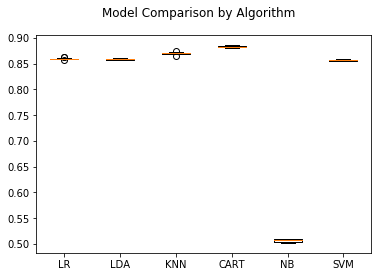

In [72]:
# Set up a dataframe to hold each model alogorithm as well as the results
# 10-fold cross validation on each or the algorithms to find the best one
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare the models created with each algorithm with box plots
fig = plt.figure()
fig.suptitle('Model Comparison by Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Text(0.5,0.98,'Algorithm Comparison')

{'boxes': [<matplotlib.lines.Line2D at 0x1a1c12cdd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab53df9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ab53e7748>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ab53e72e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1ab53df048>,
  <matplotlib.lines.Line2D at 0x1a17743128>]}

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

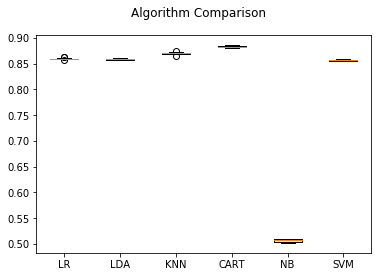

In [73]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [78]:
Dec_Tree = DecisionTreeClassifier()
Dec_Tree.fit(X_train,Y_train)
predictions = Dec_Tree.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8835824985537253
[[52543  2383]
 [ 5264  5496]]
             precision    recall  f1-score   support

          0       0.91      0.96      0.93     54926
          1       0.70      0.51      0.59     10760

avg / total       0.87      0.88      0.88     65686



In [66]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [82]:
columns = df_one.columns.tolist()
col_list = [c for c in columns if c not in ['homeless','subabuse','incarc']]
export_graphviz(Dec_Tree, out_file='tree.dot', feature_names=col_list)
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0

In [49]:
df_one.to_csv("~/Desktop/foster_one.csv")

In [95]:
column_names = [
'children_no',
'children_yes',
'children_declined',
'children_blank',
'children_0',
'cnctadult_no',
'cnctadult_yes',
'cnctadult_declined',
'cnctadult_blank',
'cnctadult_0',
'currenroll_no',
'currenroll_yes',
'currenroll_declined',
'currenroll_blank',
'currenroll_0',
'currfte_no',
'currfte_yes',
'currfte_declined',
'currfte_blank',
'currfte_0',
'currpte_no',
'currpte_yes',
'currpte_declined',
'currpte_blank',
'currpte_0',
'emplysklls_no',
'emplysklls_yes',
'emplysklls_declined',
'emplysklls_blank',
'emplysklls_0',
'outcmrpt_participated',
'outcmrpt_declined',
'outcmrpt_parent_declined',
'outcmrpt_incapacitated',
'outcmrpt_incarcerated',
'outcmrpt_runaway_or_missing',
'outcmrpt_unable_to_locate',
'outcmrpt_death',
'outcmrpt_not_in_sample',
'outcmrpt_blank',
'outcmrpt_0',
'sex_male',
'sex_female',
'sex_0',
'st_AK',
'st_AL',
'st_AR',
'st_AZ',
'st_CA',
'st_CO',
'st_CT',
'st_DC',
'st_DE',
'st_FL',
'st_GA',
'st_HI',
'st_IA',
'st_ID',
'st_IL',
'st_IN',
'st_KS',
'st_KY',
'st_LA',
'st_MA',
'st_MD',
'st_ME',
'st_MI',
'st_MN',
'st_MO',
'st_MS',
'st_MT',
'st_NC',
'st_ND',
'st_NE',
'st_NH',
'st_NJ',
'st_NM',
'st_NV',
'st_NY',
'st_OH',
'st_OK',
'st_OR',
'st_PA',
'st_PR',
'st_RI',
'st_SC',
'st_SD',
'st_TN',
'st_TX',
'st_UT',
'st_VA',
'st_VT',
'st_WA',
'st_WI',
'st_WV',
'st_WY',
'fcstatsv_No',
'fcstatsv_Yes',
'fcstatsv_0',
'delinqntsv_No',
'delinqntsv_Yes',
'delinqntsv_Blank',
'delinqntsv_0',
'edlevlsv_Less_than_6th_grade',
'edlevlsv_6th_grade',
'edlevlsv_7th_grade',
'edlevlsv_8th_grade',
'edlevlsv_9th_grade',
'edlevlsv_10th_grade',
'edlevlsv_11th_grade',
'edlevlsv_12th_grade',
'edlevlsv_Post_secondary',
'edlevlsv_College',
'edlevlsv_Blank',
'edlevlsv_0',
'specedsv_No',
'specedsv_Yes',
'specedsv_Blank',
'specedsv_0',
'ilnasv_No',
'ilnasv_Yes',
'ilnasv_Blank',
'ilnasv_0',
'mentorsv_No',
'mentorsv_Yes',
'mentorsv_Blank',
'mentorsv_0',
'race_White_Only',
'race_Black_Only',
'race_AmInd_AK_Native_Only',
'race_Asian_Only',
'race_Pac_Islander_Only',
'race_multi',
'race_Race_Missing',
'race_0',
'homeless',
'incarc',
'subabuse'
]

In [96]:
column_feat = [
    tf.feature_column.numeric_column(key=	'children_no'	),
    tf.feature_column.numeric_column(key=	'children_yes'	),
    tf.feature_column.numeric_column(key=	'children_declined'	),
    tf.feature_column.numeric_column(key=	'children_blank'	),
    tf.feature_column.numeric_column(key=	'children_0'	),
    tf.feature_column.numeric_column(key=	'cnctadult_no'	),
    tf.feature_column.numeric_column(key=	'cnctadult_yes'	),
    tf.feature_column.numeric_column(key=	'cnctadult_declined'	),
    tf.feature_column.numeric_column(key=	'cnctadult_blank'	),
    tf.feature_column.numeric_column(key=	'cnctadult_0'	),
    tf.feature_column.numeric_column(key=	'currenroll_no'	),
    tf.feature_column.numeric_column(key=	'currenroll_yes'	),
    tf.feature_column.numeric_column(key=	'currenroll_declined'	),
    tf.feature_column.numeric_column(key=	'currenroll_blank'	),
    tf.feature_column.numeric_column(key=	'currenroll_0'	),
    tf.feature_column.numeric_column(key=	'currfte_no'	),
    tf.feature_column.numeric_column(key=	'currfte_yes'	),
    tf.feature_column.numeric_column(key=	'currfte_declined'	),
    tf.feature_column.numeric_column(key=	'currfte_blank'	),
    tf.feature_column.numeric_column(key=	'currfte_0'	),
    tf.feature_column.numeric_column(key=	'currpte_no'	),
    tf.feature_column.numeric_column(key=	'currpte_yes'	),
    tf.feature_column.numeric_column(key=	'currpte_declined'	),
    tf.feature_column.numeric_column(key=	'currpte_blank'	),
    tf.feature_column.numeric_column(key=	'currpte_0'	),
    tf.feature_column.numeric_column(key=	'emplysklls_no'	),
    tf.feature_column.numeric_column(key=	'emplysklls_yes'	),
    tf.feature_column.numeric_column(key=	'emplysklls_declined'	),
    tf.feature_column.numeric_column(key=	'emplysklls_blank'	),
    tf.feature_column.numeric_column(key=	'emplysklls_0'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_participated'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_declined'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_parent_declined'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_incapacitated'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_incarcerated'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_runaway_or_missing'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_unable_to_locate'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_death'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_not_in_sample'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_blank'	),
    tf.feature_column.numeric_column(key=	'outcmrpt_0'	),
    tf.feature_column.numeric_column(key=	'sex_male'	),
    tf.feature_column.numeric_column(key=	'sex_female'	),
    tf.feature_column.numeric_column(key=	'sex_0'	),
    tf.feature_column.numeric_column(key=	'st_AK'	),
    tf.feature_column.numeric_column(key=	'st_AL'	),
    tf.feature_column.numeric_column(key=	'st_AR'	),
    tf.feature_column.numeric_column(key=	'st_AZ'	),
    tf.feature_column.numeric_column(key=	'st_CA'	),
    tf.feature_column.numeric_column(key=	'st_CO'	),
    tf.feature_column.numeric_column(key=	'st_CT'	),
    tf.feature_column.numeric_column(key=	'st_DC'	),
    tf.feature_column.numeric_column(key=	'st_DE'	),
    tf.feature_column.numeric_column(key=	'st_FL'	),
    tf.feature_column.numeric_column(key=	'st_GA'	),
    tf.feature_column.numeric_column(key=	'st_HI'	),
    tf.feature_column.numeric_column(key=	'st_IA'	),
    tf.feature_column.numeric_column(key=	'st_ID'	),
    tf.feature_column.numeric_column(key=	'st_IL'	),
    tf.feature_column.numeric_column(key=	'st_IN'	),
    tf.feature_column.numeric_column(key=	'st_KS'	),
    tf.feature_column.numeric_column(key=	'st_KY'	),
    tf.feature_column.numeric_column(key=	'st_LA'	),
    tf.feature_column.numeric_column(key=	'st_MA'	),
    tf.feature_column.numeric_column(key=	'st_MD'	),
    tf.feature_column.numeric_column(key=	'st_ME'	),
    tf.feature_column.numeric_column(key=	'st_MI'	),
    tf.feature_column.numeric_column(key=	'st_MN'	),
    tf.feature_column.numeric_column(key=	'st_MO'	),
    tf.feature_column.numeric_column(key=	'st_MS'	),
    tf.feature_column.numeric_column(key=	'st_MT'	),
    tf.feature_column.numeric_column(key=	'st_NC'	),
    tf.feature_column.numeric_column(key=	'st_ND'	),
    tf.feature_column.numeric_column(key=	'st_NE'	),
    tf.feature_column.numeric_column(key=	'st_NH'	),
    tf.feature_column.numeric_column(key=	'st_NJ'	),
    tf.feature_column.numeric_column(key=	'st_NM'	),
    tf.feature_column.numeric_column(key=	'st_NV'	),
    tf.feature_column.numeric_column(key=	'st_NY'	),
    tf.feature_column.numeric_column(key=	'st_OH'	),
    tf.feature_column.numeric_column(key=	'st_OK'	),
    tf.feature_column.numeric_column(key=	'st_OR'	),
    tf.feature_column.numeric_column(key=	'st_PA'	),
    tf.feature_column.numeric_column(key=	'st_PR'	),
    tf.feature_column.numeric_column(key=	'st_RI'	),
    tf.feature_column.numeric_column(key=	'st_SC'	),
    tf.feature_column.numeric_column(key=	'st_SD'	),
    tf.feature_column.numeric_column(key=	'st_TN'	),
    tf.feature_column.numeric_column(key=	'st_TX'	),
    tf.feature_column.numeric_column(key=	'st_UT'	),
    tf.feature_column.numeric_column(key=	'st_VA'	),
    tf.feature_column.numeric_column(key=	'st_VT'	),
    tf.feature_column.numeric_column(key=	'st_WA'	),
    tf.feature_column.numeric_column(key=	'st_WI'	),
    tf.feature_column.numeric_column(key=	'st_WV'	),
    tf.feature_column.numeric_column(key=	'st_WY'	),
    tf.feature_column.numeric_column(key=	'fcstatsv_No'	),
    tf.feature_column.numeric_column(key=	'fcstatsv_Yes'	),
    tf.feature_column.numeric_column(key=	'fcstatsv_0'	),
    tf.feature_column.numeric_column(key=	'delinqntsv_No'	),
    tf.feature_column.numeric_column(key=	'delinqntsv_Yes'	),
    tf.feature_column.numeric_column(key=	'delinqntsv_Blank'	),
    tf.feature_column.numeric_column(key=	'delinqntsv_0'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_Less_than_6th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_6th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_7th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_8th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_9th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_10th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_11th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_12th_grade'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_Post_secondary'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_College'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_Blank'	),
    tf.feature_column.numeric_column(key=	'edlevlsv_0'	),
    tf.feature_column.numeric_column(key=	'specedsv_No'	),
    tf.feature_column.numeric_column(key=	'specedsv_Yes'	),
    tf.feature_column.numeric_column(key=	'specedsv_Blank'	),
    tf.feature_column.numeric_column(key=	'specedsv_0'	),
    tf.feature_column.numeric_column(key=	'ilnasv_No'	),
    tf.feature_column.numeric_column(key=	'ilnasv_Yes'	),
    tf.feature_column.numeric_column(key=	'ilnasv_Blank'	),
    tf.feature_column.numeric_column(key=	'ilnasv_0'	),
    tf.feature_column.numeric_column(key=	'mentorsv_No'	),
    tf.feature_column.numeric_column(key=	'mentorsv_Yes'	),
    tf.feature_column.numeric_column(key=	'mentorsv_Blank'	),
    tf.feature_column.numeric_column(key=	'mentorsv_0'	),
    tf.feature_column.numeric_column(key=	'race_White_Only'	),
    tf.feature_column.numeric_column(key=	'race_Black_Only'	),
    tf.feature_column.numeric_column(key=	'race_AmInd_AK_Native_Only'	),
    tf.feature_column.numeric_column(key=	'race_Asian_Only'	),
    tf.feature_column.numeric_column(key=	'race_Pac_Islander_Only'	),
    tf.feature_column.numeric_column(key=	'race_multi'	),
    tf.feature_column.numeric_column(key=	'race_Race_Missing'	),
    tf.feature_column.numeric_column(key=	'race_0'	)
]

In [97]:
df_one.columns = column_names

In [98]:
df_one.columns

Index(['children_no', 'children_yes', 'children_declined', 'children_blank',
       'children_0', 'cnctadult_no', 'cnctadult_yes', 'cnctadult_declined',
       'cnctadult_blank', 'cnctadult_0',
       ...
       'race_Black_Only', 'race_AmInd_AK_Native_Only', 'race_Asian_Only',
       'race_Pac_Islander_Only', 'race_multi', 'race_Race_Missing', 'race_0',
       'homeless', 'incarc', 'subabuse'],
      dtype='object', length=138)

In [61]:
df_one_rand = df_one.copy()

df_one_rand = df_one_rand.set_index(np.random.permutation(df_one_rand.index))

In [62]:
df_one_rand

,children_no,children_yes,children_declined,children_blank,children_0,cnctadult_no,cnctadult_yes,cnctadult_declined,cnctadult_blank,cnctadult_0,...,race_Black Only,race_AmInd / AK Native Only,race_Asian Only,race_Pac Islander Only,race_>1 Race,race_Race Missing,race_0,homeless,incarc,subabuse
PAYK3TCLQGV5RG,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MI000005285813,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
NY012268947080,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
KYÂªÂ¡Â¬Â½Â¶Â¾Â²Â¸Â®Â¾Â¸Ã¶,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
SC000107055936,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
WA002D3MXZ551T,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
CA00E9yavlR36B,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
CO000220385159,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
CA00BNWdRceJ7Q,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
FL507841000039,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [99]:
# Code adapted from https://www.codeproject.com/Articles/1228615/Introduction-to-TensorFlow-With-Python-Example
# Shuffle the rows in the dataset
df_one_rand = df_one.copy()

df_one_rand = df_one_rand.set_index(np.random.permutation(df_one_rand.index))

# Create training and test sets for TensorFlow
train = df_one_rand.iloc[0:250000,0:138]
test = df_one_rand.iloc[250000:328428,0:138]

train_x = train.iloc[:,0:138]
train_y = train.iloc[:,136]
test_x = test.iloc[:,0:138]
test_y = test.iloc[:,136]

train_y = train_y.astype(int)
test_y = test_y.astype(int)

# Create a list of feature columns in TensorFlow

column_feat

[_NumericColumn(key='children_no', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='children_yes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='children_declined', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='children_blank', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='children_0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cnctadult_no', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cnctadult_yes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cnctadult_declined', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cnctadult_blank', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cn

In [79]:
print(len(column_feat))

135


In [100]:
# Set up a Neural Network classifier in TensorFlow
classifier = tf.estimator.DNNClassifier(
    feature_columns=column_feat,
    hidden_units=[10, 10],
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/26/l5g71x7s5rjdzhftk75h0hsh0000gn/T/tmps9c1zbgb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1ad5115dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [101]:
# Training the Neural Network Model
def train_function(inputs, outputs, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(inputs), outputs))
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

classifier.train(
    input_fn=lambda:train_function(train_x, train_y, 100),
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/26/l5g71x7s5rjdzhftk75h0hsh0000gn/T/tmps9c1zbgb/model.ckpt.
INFO:tensorflow:loss = 65.49997, step = 1
INFO:tensorflow:global_step/sec: 25.1093
INFO:tensorflow:loss = 16.099056, step = 101 (3.983 sec)
INFO:tensorflow:global_step/sec: 89.1919
INFO:tensorflow:loss = 19.952251, step = 201 (1.121 sec)
INFO:tensorflow:global_step/sec: 87.2049
INFO:tensorflow:loss = 19.163185, step = 301 (1.147 sec)
INFO:tensorflow:global_step/sec: 87.9637
INFO:tensorflow:loss = 20.693155, step = 401 (1.137 sec)
INFO:tensorflow:global_step/sec: 85.0881
INFO:tensorflow:loss = 34.895164, step = 501 (1.175 sec)
INFO:tensorflow:global_step/sec: 84.4961
INFO:tensorflow:loss = 29.886427, step = 601 (1.184 sec)
INFO:tensorflo

In [102]:
# Evaluating the Neural Network Model
def evaluation_function(attributes, classes, batch_size):
    attributes=dict(attributes)
    if classes is None:
        inputs = attributes
    else:
        inputs = (attributes, classes)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

eval_result = classifier.evaluate(
    input_fn=lambda:evaluation_function(test_x, test_y, 100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-09-02:53:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/26/l5g71x7s5rjdzhftk75h0hsh0000gn/T/tmps9c1zbgb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-09-02:54:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.81459427, accuracy_baseline = 0.80049217, auc = 0.80586296, auc_precision_recall = 0.48508084, average_loss = 0.39649075, global_step = 1000, label/mean = 0.19950783, loss = 39.61271, precision = 0.565677, prediction/mean = 0.20739768, recall = 0.3044034
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/26/l5g71x7s5rjdzhftk75h0hsh0000gn/T/tmps9c1zbgb/model.ckpt-1000
